In [1]:
'''

1.Reshaping the images 

2.storing in Images

3. Applying Autoencoders

'''

'\n\n1.Reshaping the images \n\n2.storing in Images\n\n3. Applying Autoencoders\n\n'

In [34]:
from PIL import Image
import os   

In [35]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors
n_neigh = 7

In [36]:
def list_files(dir):
    list_of_images = []
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file == '.DS_Store':
                continue
            else:
                list_of_images.append(str(os.path.join(subdir, file)))
    return list_of_images

In [37]:
def resize_img_save_it(list_of_paths):
    for img in list_of_paths:
        try:
            im1 = Image.open(img)
            width = 228
            height = 228
            im5 = im1.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
            im5.save(img)
        except:
            print(img)
            continue
            
    
            
    

In [38]:
path = '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images'
list_of_paths = list_files(path)
resize_img_save_it(list_of_paths)
    
    

In [39]:
list_of_paths

['/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0072575.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0030706.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0128957.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0429719.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0255862.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0059275.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0398729.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0021547.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0058034.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0033080.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0021951.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0036797.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images/EM0

In [10]:
def get_numpy_array():
    X_train = []
    path = '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images'
    list_of_paths = list_files(path)
    for img in list_of_paths:
        image = cv2.imread(img)
        X_train.append(image)
        
    return (np.array(X_train),list_of_paths)
        

In [11]:
X_train,list_of_paths = get_numpy_array()

In [12]:
X_train.shape

(4070, 228, 228, 3)

In [13]:
X_train = X_train.astype('float32') / 255.

In [14]:
X_train.shape

(4070, 228, 228, 3)

In [15]:
X_train.shape

(4070, 228, 228, 3)

In [16]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [17]:
input_img = Input(shape=(228,228,3))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
history = autoencoder.fit(X_train, X_train, epochs=40, batch_size=64, callbacks=None )


Instructions for updating:
Use tf.cast instead.
Epoch 1/40
4070/4070 [==============================] - 501s 123ms/step - loss: 0.0788
Epoch 2/40
4070/4070 [==============================] - 483s 119ms/step - loss: 0.0358
Epoch 3/40
4070/4070 [==============================] - 510s 125ms/step - loss: 0.0358
Epoch 4/40
4070/4070 [==============================] - 498s 122ms/step - loss: 0.0358
Epoch 5/40
4070/4070 [==============================] - 461s 113ms/step - loss: 0.0358
Epoch 6/40
4070/4070 [==============================] - 454s 112ms/step - loss: 0.0358
Epoch 7/40
4070/4070 [==============================] - 468s 115ms/step - loss: 0.0358
Epoch 8/40
4070/4070 [==============================] - 479s 118ms/step - loss: 0.0358
Epoch 9/40
4070/4070 [==============================] - 525s 129ms/step - loss: 0.0358
Epoch 10/40
4070/4070 [==============================] - 545s 134ms/step - loss: 0.0358
Epoch 11/40
4070/4070 [==============================] - 525s 129ms/step - loss: 

In [ ]:
#history = autoencoder.fit(X_train, X_train, nb_epoch=10, batch_size=64,initial_epoch=3, callbacks=None )


In [19]:
autoencoder.save('chemistry_autoencoder.h5')


In [20]:

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 228, 228, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 114, 114, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 114, 114, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 57, 57, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 8)         584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 29, 29, 8)         0         
__________

In [21]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)


In [22]:
encoder.save('chemistry_encoder.h5')


In [23]:
X_train.shape

(4070, 228, 228, 3)

In [24]:
X_train[0].shape

(228, 228, 3)

In [25]:
'''import threading
index_array_list = []'''

'import threading\nindex_array_list = []'

In [26]:
from keras.models import load_model
encoder = load_model('chemistry_encoder.h5')

/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [18]:
'''for idx in np.ndindex(X_train.shape[:1:]):
    query = X_train[idx]
    index_array_list.append((idx,query))'''

In [19]:
'''def save_duplicates(idx,query):
    X_train_1 = np.delete(X_train, idx, axis=0)
    codes = encoder.predict(X_train_1)
    query_code = encoder.predict(query.reshape(1,228, 228, 3))
    codes_1 = codes.reshape(-1, 29*29*8)
    query_code_1 = query_code.reshape(1, 29*29*8)
    nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    distances, indices = nbrs.kneighbors(np.array(query_code_1))
    closest_images = X_train_1[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Output_images/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    plt.imsave(dir_name+"/"+'1.png', query)
    for i in range(n_neigh):
        plt.imsave(dir_name+"/"+str(i+2)+'.png', closest_images[i])'''

In [20]:
#threads = [threading.Thread(target=save_duplicates, args=(items[0],items[1])) for items in index_array_list]


In [21]:
#num_threads = 50

In [ ]:
'''for i in range(0,int(len(threads)/num_threads)+1):
    [ti.start() for ti in threads[i*num_threads:(i+1)*num_threads]]
    [ti.join() for ti in threads[i*num_threads:(i+1)*num_threads]]'''

In [16]:
'''for idx in np.ndindex(X_train.shape[:1:]):
    query = X_train[idx]
    X_train_1 = np.delete(X_train, idx, axis=0)
    codes = encoder.predict(X_train_1)
    query_code = encoder.predict(query.reshape(1,228, 228, 3))
    codes_1 = codes.reshape(-1, 29*29*8)
    query_code_1 = query_code.reshape(1, 29*29*8)
    nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    distances, indices = nbrs.kneighbors(np.array(query_code_1))
    closest_images = X_train_1[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Output_images/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    plt.imsave(dir_name+"/"+'1.png', query)
    for i in range(n_neigh):
        plt.imsave(dir_name+"/"+str(i+2)+'.png', closest_images[i])'''
        
        





    

KeyboardInterrupt: 

In [16]:
query = X_train[1230]


In [35]:
query

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

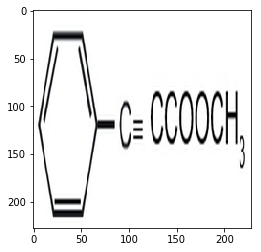

In [17]:
plt.imshow(query)


In [18]:
query.shape

(228, 228, 3)

In [19]:
X_train_1 = np.delete(X_train,578, axis=0)


In [20]:
codes = encoder.predict(X_train_1)


In [33]:
codes

NameError: name 'codes' is not defined

In [21]:
X_train_1.shape

(4069, 228, 228, 3)

In [22]:
query_code = encoder.predict(query.reshape(1,228, 228, 3))

In [23]:
query_code.shape


(1, 29, 29, 8)

In [24]:
codes.shape

(4069, 29, 29, 8)

In [25]:
from sklearn.neighbors import NearestNeighbors


In [26]:
n_neigh = 10

In [27]:
codes_1 = codes.reshape(-1, 29*29*8); 
print(codes_1.shape)
query_code_1 = query_code.reshape(1, 29*29*8); 
print(query_code_1.shape)

(4069, 6728)
(1, 6728)


In [28]:
nbrs = NearestNeighbors(n_neighbors=n_neigh,metric='cosine').fit(codes_1)


In [29]:
distances, indices = nbrs.kneighbors(np.array(query_code_1))


In [58]:
distances[0].tolist()

[0.0,
 0.011118471622467041,
 0.10314452648162842,
 0.10532760620117188,
 0.1068652868270874,
 0.11303102970123291,
 0.11924105882644653,
 0.12015628814697266,
 0.12015628814697266,
 0.12015628814697266]

In [31]:
list(zip(indices,distances))

[(array([1229, 1359, 2309, 2132, 3656, 1400, 2580, 1749, 3501, 1250]),
  array([0.        , 0.01111847, 0.10314453, 0.10532761, 0.10686529,
         0.11303103, 0.11924106, 0.12015629, 0.12015629, 0.12015629],
        dtype=float32))]

In [32]:
closest_images = X_train_1[indices]


In [57]:
closest_images[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [33]:
closest_images = closest_images.reshape(-1,228,228,3); 
print(closest_images.shape)


(10, 228, 228, 3)


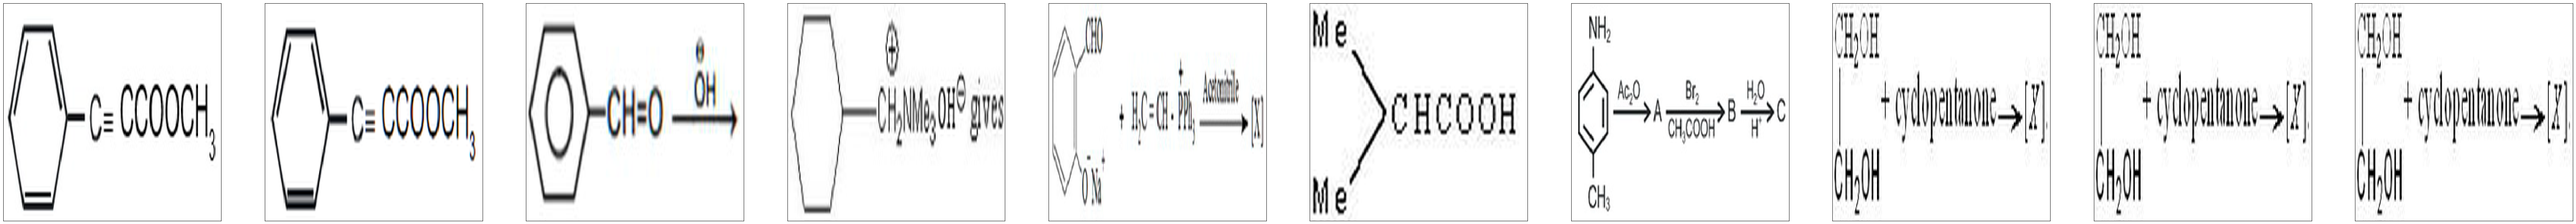

In [34]:
plt.figure(figsize=(100, 12))
for i in range(n_neigh):
    # display original
    ax = plt.subplot(1, n_neigh, i+1)
    plt.imshow(closest_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

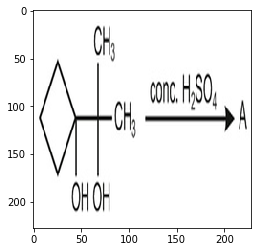

In [169]:
plt.imshow(query)

In [ ]:
'''input_img = Input(shape=(225,225,3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')'''

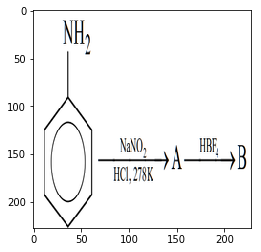

In [62]:
plt.imshow(query)


In [63]:
plt.imsave('test.png', query)


In [64]:
os.mkdir("Output_images/set1")

In [66]:
idx = 0

In [67]:
dir_name = "Output_images/set" + str(idx+1)

In [68]:
dir_name

'Output_images/set1'

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[]

In [ ]:
################# Todays Experiment ##############################

In [251]:
lower_dimension_codes = encoder.predict(X_train)

In [252]:
lower_dimension_codes.shape

(4069, 29, 29, 8)

In [253]:
codes_1 = lower_dimension_codes.reshape(-1, 29*29*8)
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)

In [254]:
codes_1.shape

(4069, 6728)

In [255]:
nbrs

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=7, p=2, radius=1.0)

In [126]:
import time

In [127]:
for idx in np.ndindex(lower_dimension_codes.shape[:1:]):
    start_time = time.time()
    query = lower_dimension_codes[idx]
    #X_train_1 = np.delete(lower_dimension_codes, idx, axis=0)
    higher_dimension_codes_query = X_train[idx]
    #codes_1 = X_train_1.reshape(-1, 29*29*8)
    query_code_1 = query.reshape(1, 29*29*8)
    #nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    
    
    distances, indices = nbrs.kneighbors(np.array(query_code_1))
    
    closest_images = X_train[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Output_images/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    plt.imsave(dir_name+"/"+'1.png', higher_dimension_codes_query)
    
    for i in range(n_neigh):
        plt.imsave(dir_name+"/"+str(i+2)+'.png', closest_images[i])
    
    end_time = time.time()
    print(end_time - start_time)

0.12729287147521973
0.11197090148925781
0.1535658836364746
0.12457108497619629
0.050440073013305664
0.13853693008422852
0.1532909870147705
0.1872701644897461
0.229050874710083
0.20564818382263184
0.14792799949645996
0.12698888778686523
0.10645914077758789
0.12914824485778809
0.15966582298278809
0.14751815795898438
0.07833075523376465
0.11729097366333008
0.12529802322387695
0.11918997764587402
0.1208651065826416
0.13126397132873535
0.12859106063842773
0.14228510856628418
0.12640595436096191
0.13540005683898926
0.12635421752929688
0.11716508865356445
0.12340998649597168
0.1662921905517578
0.17001080513000488
0.10649776458740234
0.11702299118041992
0.11953306198120117
0.1287698745727539
0.14375090599060059
0.1395859718322754
0.11109590530395508
0.09866118431091309
0.11406302452087402
0.13689184188842773
0.12472820281982422
0.1491861343383789
0.13825011253356934
0.18581604957580566
0.15890097618103027
0.17180991172790527
0.18137598037719727
0.13950300216674805
0.14702582359313965
0.1256368

0.15897417068481445
0.17474889755249023
0.10208988189697266
0.10907697677612305
0.11638712882995605
0.12453198432922363
0.15421104431152344
0.14530587196350098
0.1295030117034912
0.15028691291809082
0.17788910865783691
0.1237797737121582
0.13173699378967285
0.16637539863586426
0.17861104011535645
0.25885796546936035
0.25133514404296875
0.20703887939453125
0.19126176834106445
0.20439505577087402
0.12587213516235352
0.1228640079498291
0.12044167518615723
0.11694478988647461
0.11118197441101074
0.14977812767028809
0.14116930961608887
0.14530205726623535
0.11392378807067871
0.11813473701477051
0.12778782844543457
0.1349639892578125
0.12099981307983398
0.09934306144714355
0.11118197441101074
0.11998891830444336
0.10788393020629883
0.12191200256347656
0.11882591247558594
0.10699796676635742
0.11297178268432617
0.09992408752441406
0.11398601531982422
0.10671210289001465
0.11558914184570312
0.060552358627319336
0.1431889533996582
0.11459517478942871
0.11222577095031738
0.09703922271728516
0.11

0.1190938949584961
0.09685611724853516
0.10854315757751465
0.11965322494506836
0.12220883369445801
0.12751197814941406
0.14869093894958496
0.11329412460327148
0.11770915985107422
0.12380099296569824
0.11554288864135742
0.12030982971191406
0.13127708435058594
0.10661721229553223
0.12731003761291504
0.10126996040344238
0.11022090911865234
0.0644369125366211
0.11775398254394531
0.10809516906738281
0.10349678993225098
0.04171109199523926
0.10906076431274414
0.11296486854553223
0.13573002815246582
0.10838079452514648
0.11100220680236816
0.11228799819946289
0.1148679256439209
0.127366304397583
0.12731122970581055
0.12270092964172363
0.12753915786743164
0.11948108673095703
0.12636399269104004
0.10277414321899414
0.14261889457702637
0.12999224662780762
0.11839413642883301
0.10042285919189453
0.12655901908874512
0.14459800720214844
0.13925981521606445
0.1012258529663086
0.11192584037780762
0.1094970703125
0.13614487648010254
0.1196908950805664
0.11943674087524414
0.11208891868591309
0.112680912

0.1453702449798584
0.13002610206604004
0.1324760913848877
0.12624883651733398
0.13511395454406738
0.11689496040344238
0.12043905258178711
0.1295628547668457
0.1186668872833252
0.15181612968444824
0.12233901023864746
0.1214449405670166
0.14084792137145996
0.12212991714477539
0.13039278984069824
0.11408209800720215
0.11356496810913086
0.1277329921722412
0.15342187881469727
0.11472702026367188
0.13180232048034668
0.13783001899719238
0.12378501892089844
0.1251211166381836
0.11397886276245117
0.12964820861816406
0.14700889587402344
0.15058088302612305
0.13438200950622559
0.1636190414428711
0.12982392311096191
0.11384797096252441
0.12654781341552734
0.13539600372314453
0.1262071132659912
0.12289094924926758
0.14392781257629395
0.14203882217407227
0.12072587013244629
0.11849379539489746
0.12695598602294922
0.12061214447021484
0.12220597267150879
0.16030430793762207
0.14222478866577148
0.12016677856445312
0.13005685806274414
0.11577701568603516
0.14225983619689941
0.10686492919921875
0.1173057

0.11369705200195312
0.16313695907592773
0.10464000701904297
0.11324501037597656
0.11510396003723145
0.09940195083618164
0.12929892539978027
0.11548900604248047
0.11099600791931152
0.13347291946411133
0.09970307350158691
0.15185213088989258
0.1376190185546875
0.11160397529602051
0.1223599910736084
0.1059567928314209
0.13257288932800293
0.14954710006713867
0.11778378486633301
0.10905218124389648
0.10990095138549805
0.11410999298095703
0.10126686096191406
0.13598179817199707
0.12718415260314941
0.14571499824523926
0.12212300300598145
0.11933326721191406
0.21374797821044922
0.09715890884399414
0.10623693466186523
0.1148080825805664
0.11718487739562988
0.10824012756347656
0.1068260669708252
0.10222291946411133
0.10611796379089355
0.11666202545166016
0.1268329620361328
0.13359427452087402
0.14596223831176758
0.13063693046569824
0.13606905937194824
0.13050508499145508
0.11385297775268555
0.11296415328979492
0.10381007194519043
0.11576318740844727
0.12784910202026367
0.12127423286437988
0.1360

0.14110493659973145
0.13091301918029785
0.14483189582824707
0.12754106521606445
0.1544651985168457
0.17904424667358398
0.1332252025604248
0.18039608001708984
0.1484661102294922
0.15111517906188965
0.13396024703979492
0.14136028289794922
0.13653087615966797
0.11064767837524414
0.13045620918273926
0.10892510414123535
0.1983499526977539
0.12128186225891113
0.1656801700592041
0.1036691665649414
0.12453389167785645
0.12103700637817383
0.11099576950073242
0.13774490356445312
0.14175200462341309
0.12417984008789062
0.17123675346374512
0.12232303619384766
0.11425995826721191
0.10349512100219727
0.05978703498840332
0.10240006446838379
0.12177205085754395
0.13139915466308594
0.11568117141723633
0.14264392852783203
0.14974403381347656
0.12570905685424805
0.1438310146331787
0.13802385330200195
0.13515019416809082
0.1355881690979004
0.11771106719970703
0.11972403526306152
0.12409615516662598
0.14139795303344727
0.04400897026062012
0.14300203323364258
0.1262221336364746
0.1262362003326416
0.18604516

0.1811389923095703
0.15822196006774902
0.1741478443145752
0.23648619651794434
0.1776731014251709
0.15372300148010254
0.21765971183776855
0.18371915817260742
0.21016979217529297
0.1495199203491211
0.20684814453125
0.1480879783630371
0.17109894752502441
0.13273119926452637
0.12212991714477539
0.09855794906616211
0.1335618495941162
0.12622785568237305
0.11382198333740234
0.13833236694335938
0.14514827728271484
0.16097187995910645
0.14129018783569336
0.13782310485839844
0.1427767276763916
0.12662291526794434
0.15219807624816895
0.12292003631591797
0.12729334831237793
0.12558412551879883
0.1249532699584961
0.12740802764892578
0.14777660369873047
0.12661099433898926
0.11603784561157227
0.11454916000366211
0.11515188217163086
0.1468799114227295
0.1267547607421875
0.11261606216430664
0.13006210327148438
0.10367107391357422
0.13669300079345703
0.11770987510681152
0.11374592781066895
0.11618399620056152
0.11354327201843262
0.1143350601196289
0.155472993850708
0.18635201454162598
0.15259480476379

0.13023924827575684
0.13739895820617676
0.11697912216186523
0.11818718910217285
0.10224604606628418
0.10577893257141113
0.13524293899536133
0.11078310012817383
0.1117093563079834
0.13057279586791992
0.11714982986450195
0.12620997428894043
0.10522222518920898
0.11725902557373047
0.12281012535095215
0.11705708503723145
0.11900806427001953
0.1298389434814453
0.11942291259765625
0.11530804634094238
0.12493634223937988
0.13131022453308105
0.10939192771911621
0.11368298530578613
0.13981008529663086
0.11221027374267578
0.04006195068359375
0.13026094436645508
0.11179614067077637
0.1322178840637207
0.08059096336364746
0.11913704872131348
0.12217307090759277
0.10204291343688965
0.11145806312561035
0.1112968921661377
0.11906266212463379
0.12309980392456055
0.10669994354248047
0.12326288223266602
0.1124870777130127
0.12688899040222168
0.11850690841674805
0.12119197845458984
0.11757516860961914
0.12347197532653809
0.12209320068359375
0.11434102058410645
0.11531996726989746
0.1379227638244629
0.1405

0.11670684814453125
0.11880683898925781
0.1095130443572998
0.12009596824645996
0.11037898063659668
0.10505390167236328
0.12176895141601562
0.13479304313659668
0.10882806777954102
0.10342788696289062
0.11777091026306152
0.10862588882446289
0.12097692489624023
0.11203622817993164
0.13854217529296875
0.12472105026245117
0.11323070526123047
0.15499591827392578
0.13609790802001953
0.2927701473236084
0.1824500560760498
0.30219483375549316
0.28436732292175293
0.2495560646057129
0.21830034255981445
0.1140139102935791
0.14634084701538086
0.11206603050231934
0.1613771915435791
0.1207418441772461
0.1032261848449707
0.11559915542602539
0.09056687355041504
0.10477089881896973
0.14252066612243652
0.1351940631866455
0.13492488861083984
0.10880899429321289
0.15474295616149902
0.1387770175933838
0.11718416213989258
0.11874270439147949
0.10060977935791016
0.1156620979309082
0.12845206260681152
0.12191390991210938
0.15176725387573242
0.1505270004272461
0.13303089141845703
0.13475418090820312
0.2283711433

0.11672306060791016
0.11093568801879883
0.10240888595581055
0.11078214645385742
0.12508225440979004
0.10408616065979004
0.11325502395629883
0.11640501022338867
0.10950303077697754
0.12775206565856934
0.11660099029541016
0.13153624534606934
0.11201310157775879
0.11854195594787598
0.1156609058380127
0.14880704879760742
0.10527896881103516
0.04254293441772461
0.06398701667785645
0.09977006912231445
0.1003730297088623
0.11930179595947266
0.10819387435913086
0.12431693077087402
0.09893202781677246
0.10861587524414062
0.10228800773620605
0.12360906600952148
0.09753179550170898
0.041545867919921875
0.0985269546508789
0.11996197700500488
0.11034297943115234
0.12947821617126465
0.10961604118347168
0.10304713249206543
0.09389591217041016
0.1102437973022461
0.10646891593933105
0.11486482620239258
0.11490893363952637
0.1207587718963623
0.11764407157897949
0.13156914710998535
0.11399984359741211
0.040956735610961914
0.10387778282165527
0.11202669143676758
0.1071469783782959
0.10506701469421387
0.12

In [120]:
higher_dimension_codes.shape

(4068, 228, 228, 3)

In [ ]:
nbrs = NearestNeighbors(n_neighbors=n_neigh,metric='euclidean').fit(codes_1)

In [ ]:
for idx in np.ndindex(lower_dimension_codes.shape[:1:]):
    start_time = time.time()
    query = lower_dimension_codes[idx]
    #X_train_1 = np.delete(lower_dimension_codes, idx, axis=0)
    higher_dimension_codes_query = X_train[idx]
    #codes_1 = X_train_1.reshape(-1, 29*29*8)
    query_code_1 = query.reshape(1, 29*29*8)
    #nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    
    
    distances, indices = nbrs.kneighbors(np.array(query_code_1))
    
    closest_images = X_train[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Euclidean/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    plt.imsave(dir_name+"/"+'1.png', higher_dimension_codes_query)
    
    for i in range(n_neigh):
        plt.imsave(dir_name+"/"+str(i+2)+'.png', closest_images[i])
    
    end_time = time.time()
    print(end_time - start_time)

In [30]:
list_of_images_to_remove

['/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0266457.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0266338.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0260983.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0009105.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0262926.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0413080.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0413203.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0260976.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0266334.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0266335.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/physics/images/EM0413078.jpeg',
 '/Users/nikeshmangwani/Desktop/Autoencoder/questions/